In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/college-placement-data-set/Placement_Data_Full_Class.csv


In [2]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/kaggle/input/college-placement-data-set/Placement_Data_Full_Class.csv')
df.head() # first 5 columns by default

,Sno,Gender,10th %,SSC Board,12th %,HSC Board,12th Stream,Degree %,Degree stream,Work exp,specialisation,Mba %,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,Mkt&Fin,55.50,Placed,425000.0


The dataset contains Sno,Gender,10th %,SSC Board,12th %,HSC Board,12th Stream,Degree %,Degree stream,Work exp,specialisation,Mba %,status,salary 

In [4]:
df.describe() 
#statistical analysis

,Sno,10th %,12th %,Degree %,Mba %,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,77.890000,940000.000000


In [5]:
df.isna().sum()

Sno                0
Gender             0
10th %             0
SSC Board          0
12th %             0
HSC Board          0
12th Stream        0
Degree %           0
Degree stream      0
Work exp           0
specialisation     0
Mba %              0
status             0
salary            67
dtype: int64

the salary has 67 null values

In [6]:
df.duplicated().sum()

0

no duplicated values
so moving forward

In [7]:
df.dtypes

Sno                 int64
Gender             object
10th %            float64
SSC Board          object
12th %            float64
HSC Board          object
12th Stream        object
Degree %          float64
Degree stream      object
Work exp           object
specialisation     object
Mba %             float64
status             object
salary            float64
dtype: object

In [8]:
df['status'].value_counts()  # 148 are placed and 67 are not placed

Placed        148
Not Placed     67
Name: status, dtype: int64

In [9]:
df['Gender'].value_counts() # there are 139 males and 76 females

M    139
F     76
Name: Gender, dtype: int64

In [10]:
df['12th Stream'].value_counts() # 113 are from commercebackground, 91 from science and 11 from Arts

Commerce    113
Science      91
Arts         11
Name: 12th Stream, dtype: int64

In [11]:
df['HSC Board'].value_counts() # central are 84 in 12th

Others     131
Central     84
Name: HSC Board, dtype: int64

In [12]:
df['SSC Board'].value_counts() # Hence, 116 Students were from Central Board in 10th

Central    116
Others      99
Name: SSC Board, dtype: int64

In [13]:
df['Work exp'].value_counts() # 141 have no prior experience and 74 have experience

No     141
Yes     74
Name: Work exp, dtype: int64

In [14]:
df['Degree stream'].value_counts() # Hence, 145 Students Comm&Mgmt , 59 Sci&Tech , other=11

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: Degree stream, dtype: int64

In [15]:
df['specialisation'].value_counts() # 120 in Mkt&Fin, Mkt&HR in 95

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

# Visualization

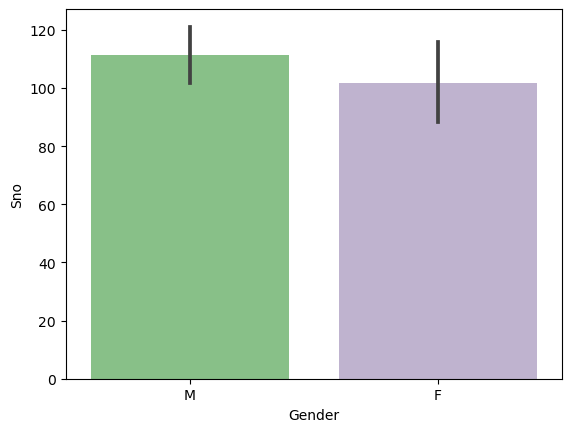

In [16]:
plt=sns.barplot(x='Gender',y='Sno',data=df,palette='Accent')

<AxesSubplot:xlabel='SSC Board', ylabel='Sno'>

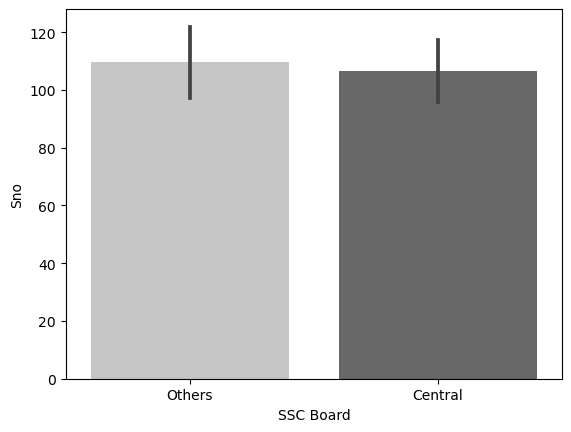

In [17]:
sns.barplot(x='SSC Board',y='Sno',data=df,palette='Greys')

<AxesSubplot:xlabel='SSC Board', ylabel='Sno'>

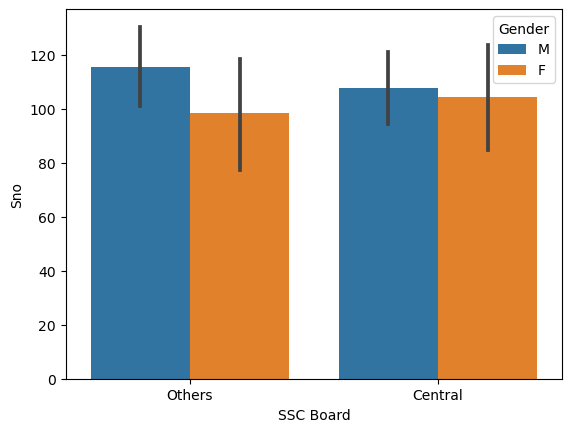

In [18]:
sns.barplot(x='SSC Board',y='Sno',data=df,hue='Gender')

<AxesSubplot:xlabel='HSC Board', ylabel='Sno'>

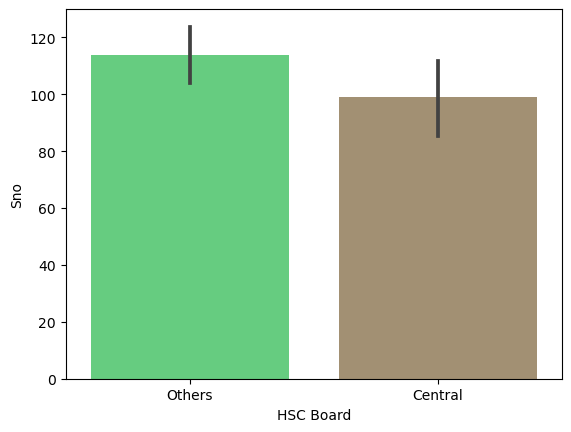

In [19]:
sns.barplot(x='HSC Board',y='Sno',data=df,palette='terrain')

<AxesSubplot:xlabel='HSC Board', ylabel='Sno'>

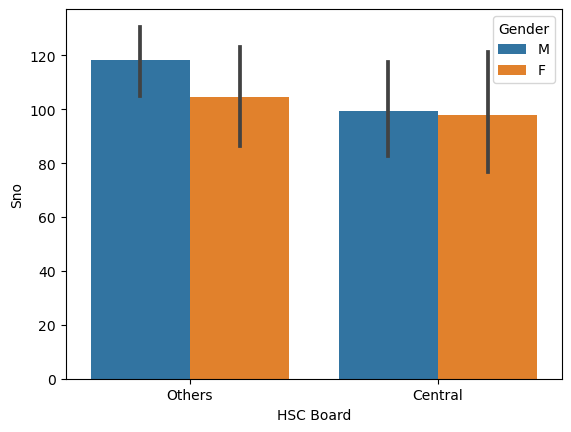

In [20]:
sns.barplot(x='HSC Board',y='Sno',data=df,hue='Gender')

<AxesSubplot:xlabel='12th Stream', ylabel='Sno'>

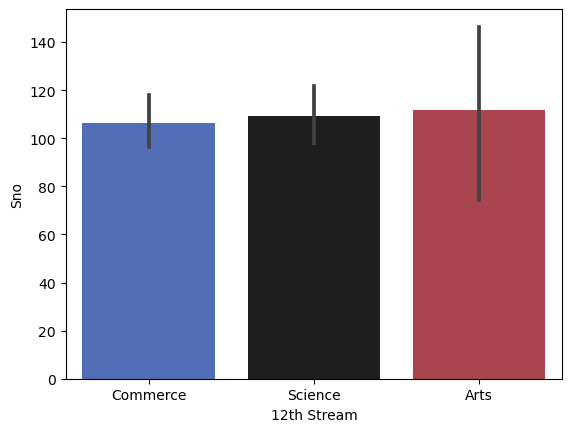

In [21]:
sns.barplot(x='12th Stream',y='Sno',data=df,palette='icefire')

<AxesSubplot:xlabel='12th Stream', ylabel='Sno'>

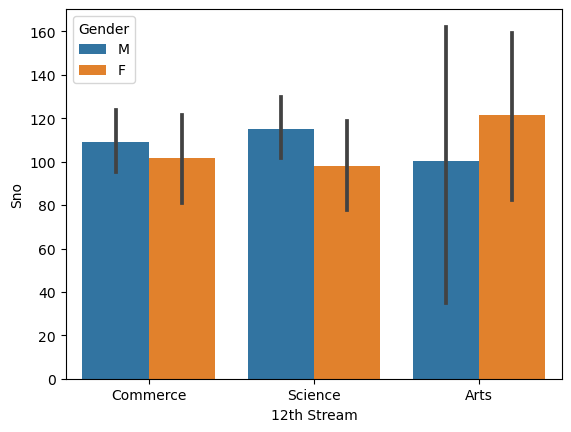

In [22]:
sns.barplot(x='12th Stream',y='Sno',data=df,hue='Gender')

<AxesSubplot:xlabel='Degree stream', ylabel='Sno'>

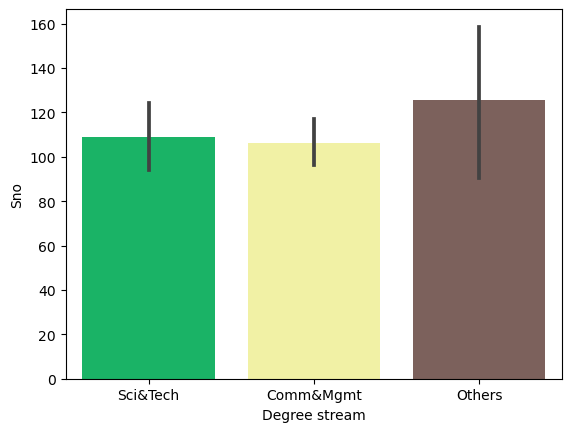

In [23]:
sns.barplot(x='Degree stream',y='Sno',data=df,palette='terrain')

<AxesSubplot:xlabel='Degree stream', ylabel='Sno'>

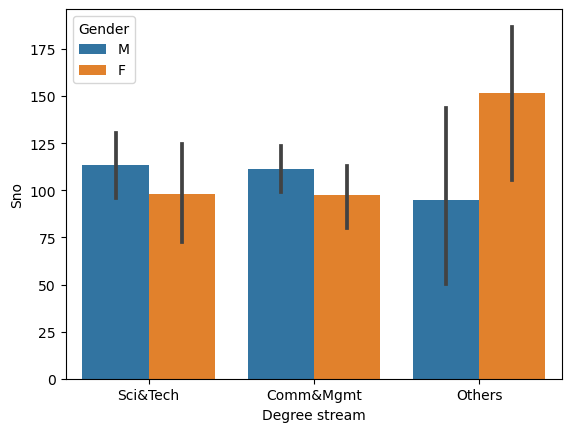

In [24]:
sns.barplot(x='Degree stream',y='Sno',data=df,hue='Gender')

<AxesSubplot:xlabel='Work exp', ylabel='Sno'>

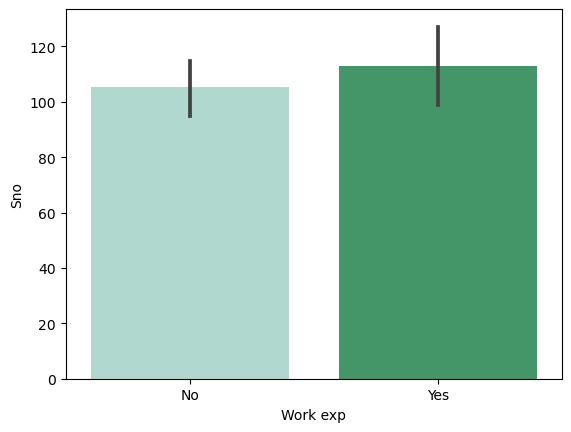

In [25]:
sns.barplot(x='Work exp',y='Sno',data=df,palette='BuGn')

<AxesSubplot:xlabel='Work exp', ylabel='Sno'>

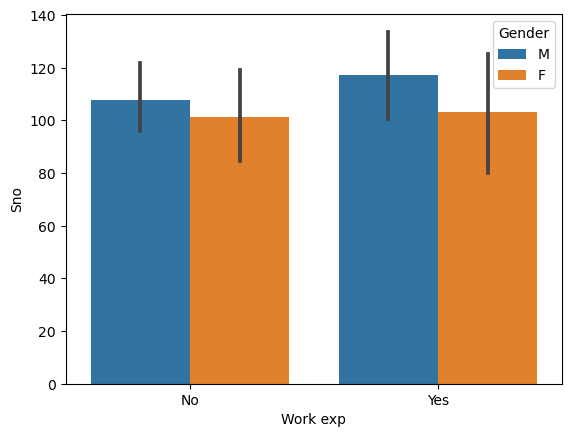

In [26]:
sns.barplot(x='Work exp',y='Sno',data=df,hue='Gender')

<AxesSubplot:xlabel='specialisation', ylabel='Sno'>

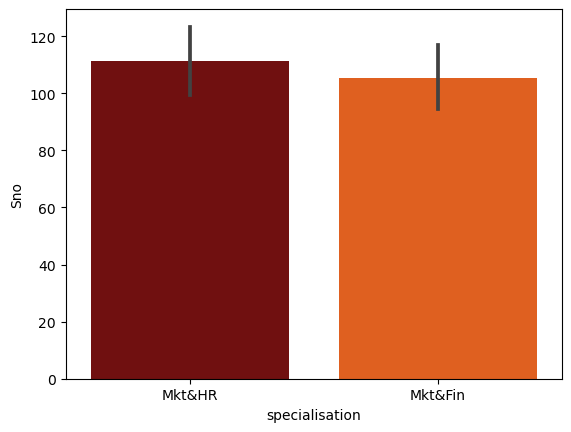

In [27]:
sns.barplot(x='specialisation',y='Sno',data=df,palette='gist_heat')

<AxesSubplot:xlabel='status', ylabel='Sno'>

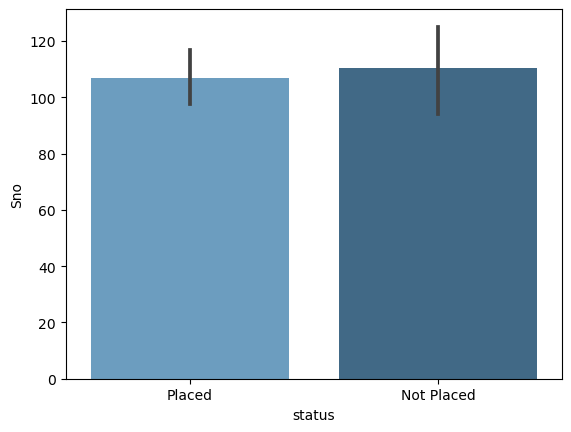

In [28]:
sns.barplot(x='status',y='Sno',data=df,palette='Blues_d')

<AxesSubplot:xlabel='Gender', ylabel='10th %'>

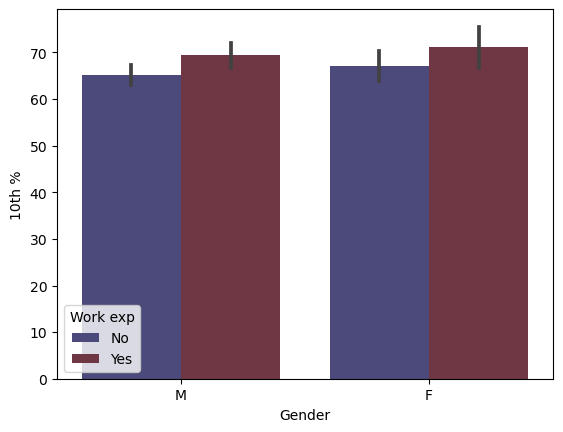

In [29]:
sns.barplot(x='Gender',y='10th %',data=df,hue='Work exp', palette='icefire')


<AxesSubplot:xlabel='SSC Board', ylabel='12th %'>

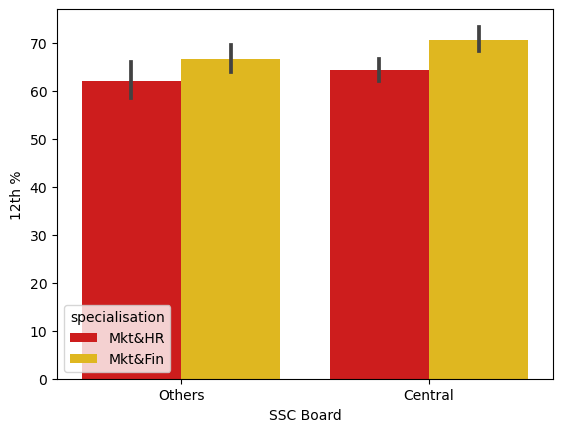

In [30]:
sns.barplot(x='SSC Board',y='12th %',data=df,hue='specialisation', palette='hot')


<AxesSubplot:xlabel='HSC Board', ylabel='Degree %'>

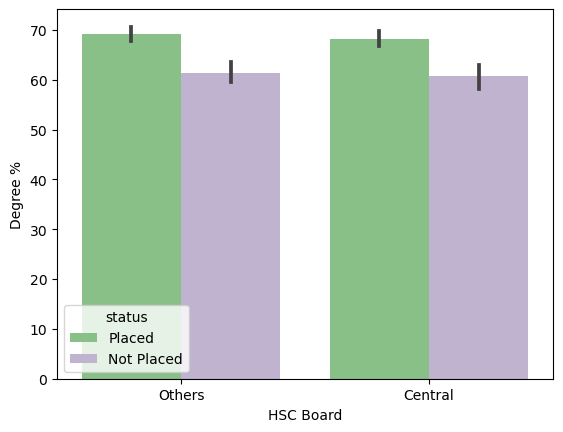

In [31]:
sns.barplot(x='HSC Board',y='Degree %',data=df,hue='status',  palette='Accent')

<AxesSubplot:xlabel='12th Stream', ylabel='Mba %'>

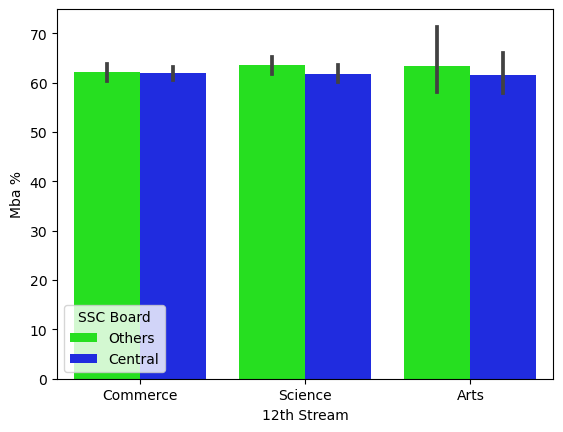

In [32]:
sns.barplot(x='12th Stream',y='Mba %',data=df,hue='SSC Board',  palette='hsv')

/opt/conda/lib/python3.7/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


<AxesSubplot:xlabel='Degree stream', ylabel='salary'>

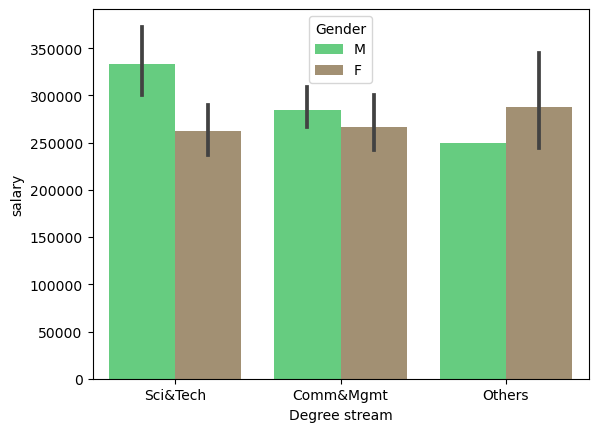

In [33]:
sns.barplot(x='Degree stream',y='salary',data=df,hue='Gender',  palette='terrain')

In [34]:
# corelation


In [35]:
corr=df.corr()
corr

,Sno,10th %,12th %,Degree %,Mba %,salary
Sno,1.000000,-0.078155,-0.085711,-0.088281,0.022327,0.063764
10th %,-0.078155,1.000000,0.511472,0.538404,0.388478,0.035330
12th %,-0.085711,0.511472,1.000000,0.434206,0.354823,0.076819
Degree %,-0.088281,0.538404,0.434206,1.000000,0.402364,-0.019272
Mba %,0.022327,0.388478,0.354823,0.402364,1.000000,0.175013
salary,0.063764,0.035330,0.076819,-0.019272,0.175013,1.000000


<AxesSubplot:>

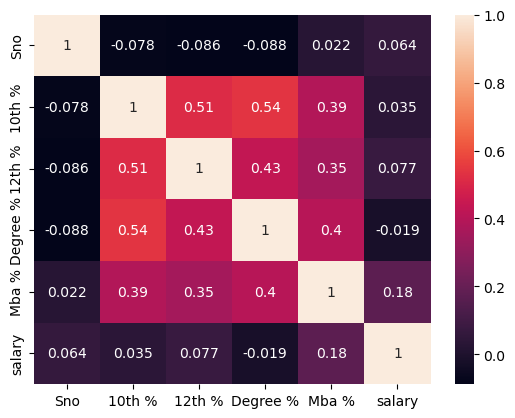

In [36]:
sns.heatmap(corr,annot=True)